<a href="https://colab.research.google.com/github/MedhaMathur31/Netflix-Data-Analysis/blob/main/NetflixDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

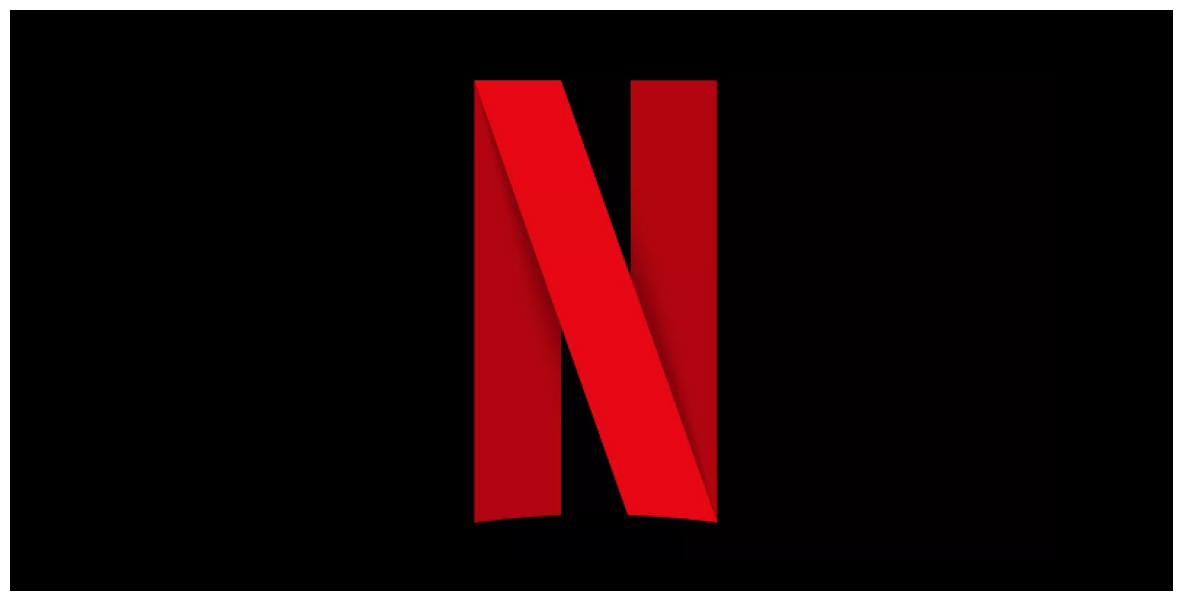

In [ ]:
# @title Default title text
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread("netflix_logo_1.jpg")

# Set the image size (adjust the width to your preference)
width = 800
height = int((width / img.shape[1]) * img.shape[0])  # Maintain the aspect ratio

# Resize the image
resized_img = cv2.resize(img, (width, height))

# Create a centered figure with Matplotlib
fig, ax = plt.subplots(1, 1, figsize=(15, 8))  # Adjust the figsize as needed

# Display the resized image without axis labels
ax.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
ax.axis('off')  # Turn off the axis labels
plt.show()




**Welcome to our 'Netflix Data Analytics: A Comprehensive Data Exploration.' project. Netflix, a global entertainment powerhouse, offers more than just streaming; it's a treasure trove of data. Our project delves into the depths of Netflix's data landscape, investigating content recommendations, user experiences, pricing strategies, and beyond. Join us on this journey to unveil the transformative power of data in the entertainment realm, reshaping how we watch and envision the future of the industry. Together, we'll navigate this digital frontier, where every data point contributes to crafting the next era of entertainment, one insight at a time**



In [ ]:
# Importing the dataset
import pandas as pd
data = pd.read_csv("Netflix_final_dataset.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,rating.1,votes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,8.5,"1,77,031"
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",8.7,"1,99,885"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",8.9,"5,01,384"
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",5.9,"9,773"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",8.6,"15,413"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers",6.6,140
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",7.8,"1,299"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",8.3,189
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies",8.6,179


In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'rating.1', 'votes'],
      dtype='object')

In [ ]:
data.shape

(8807, 13)

In [ ]:
data.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
rating.1        float64
votes            object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7982 non-null   object 
 5   country       7976 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8807 non-null   int64  
 8   rating        8803 non-null   object 
 9   duration      8804 non-null   object 
 10  listed_in     8807 non-null   object 
 11  rating.1      7643 non-null   float64
 12  votes         7643 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 894.6+ KB


**Checking for duplicates**

In [ ]:
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,rating.1,votes


since we find no duplicates we can proceed

**Checking for nulls**

In [ ]:
data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,rating.1,votes
0,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
rating.1        1164
votes           1164
dtype: int64

**Seaborn**

<Axes: >

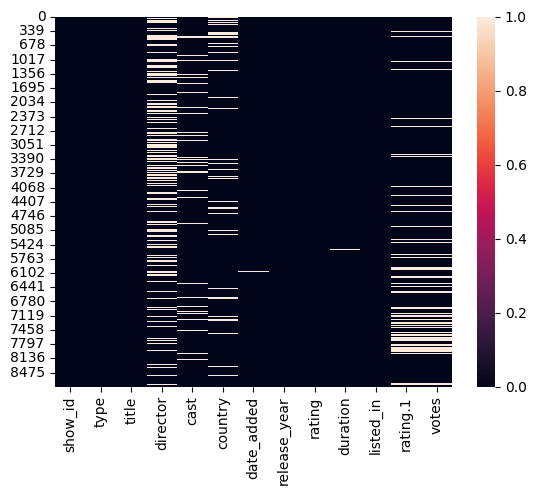

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull())

**Allowing the user to choose which show's details he wants**

In [ ]:
show=input("Enter the show's name whose details you want:")
data[data['title'].isin([show])]

Enter the show's name whose details you want:Dick Johnson Is Dead


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,rating.1,votes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,8.5,"1,77,031"


**Allowing the user to again search for shows which were released in the particular year.**

In [ ]:
import pandas as pd
from tabulate import tabulate

# Step 1: Define the criteria
year = int(input("Enter the year:"))

# Step 2: Check if the entered year is in the dataset
if year in data['release_year'].unique():
    filtered_data = data[data['release_year'] == year]

    if not filtered_data.empty:
        print(f"Shows/Movies from {year}:")
        # Use tabulate to format the data into a table
        print(tabulate(filtered_data, headers='keys', tablefmt='pretty'))
    else:
        print(f"No shows/movies found from {year}.")
else:
    print(f"This dataset doesn't have shows/movies from {year} year")


Enter the year:2000
Shows/Movies from 2000:
+------+---------+---------+-----------------------------------------------------+-------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------+--------------------+--------------+--------+-----------+-----------------------------------------------------------+----------+----------+
|      | show_id |  type   |                        title                        |           director            |                                                                                                                           cast                                                                                                                           |                    country          

**HERE WE GET TO KNOW THE NUMBER OF SHOWS RELEASED IN EACH YEAR**

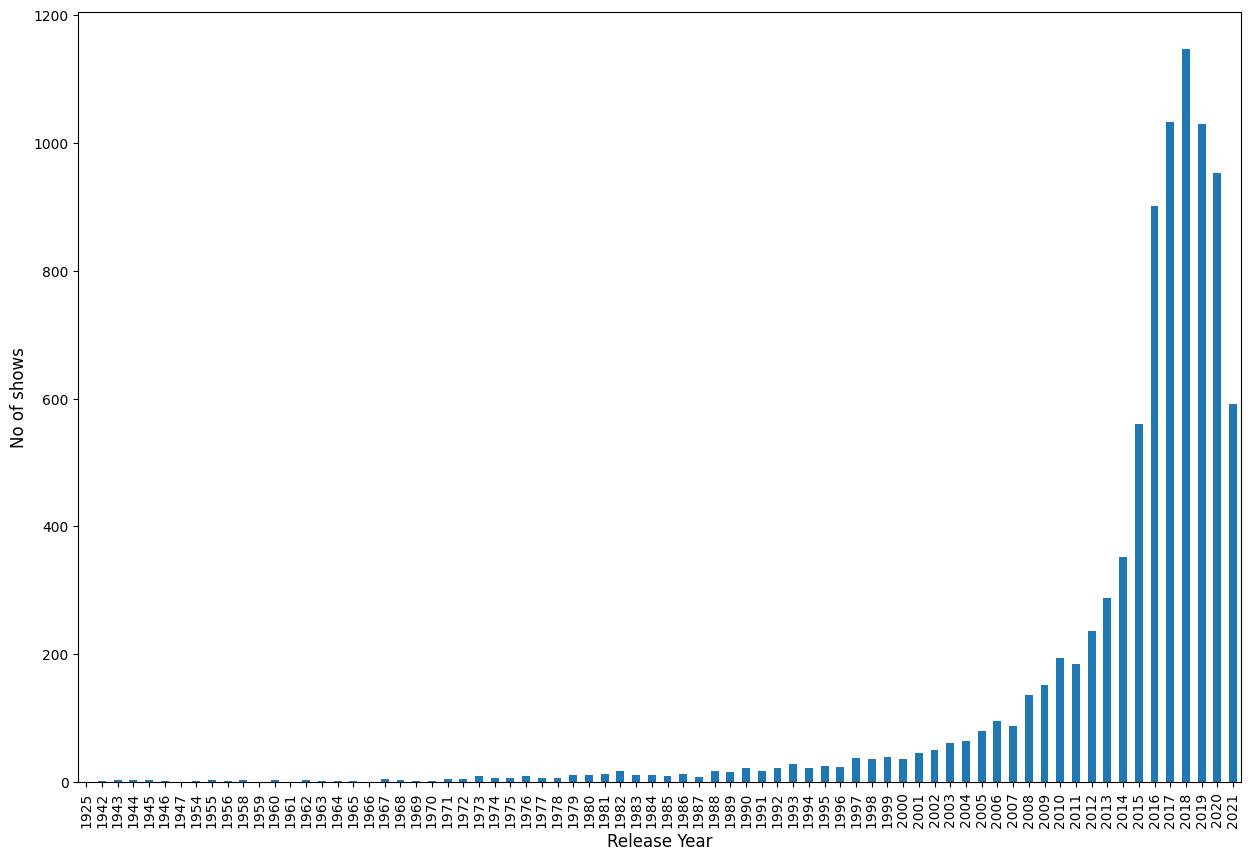

In [ ]:
import matplotlib.pyplot as plt

# Increase the figure size to adjust the spacing
plt.figure(figsize=(15, 10))  # You can adjust the width and height as needed

# Your code for creating the bar plot
data['release_year'].value_counts().sort_index().plot(kind='bar')

# Customize the x-axis labels
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('No of shows',fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


**HERE WE ANALYSE WHICH MOVIES WERE THE MOST HIGLY RATED IN A PARTICULAR COUNTRY**

In [ ]:
import pandas as pd
from tabulate import tabulate

# Step 1: Define the criteria
min_rating = 8.5  # Minimum rating threshold
selected_country = input("Enter the Country:")  # Replace with your desired country
show_type = 'Movie'  # We're interested in movies, so set the show type to 'Movie'

# Step 2: Filter the data based on the criteria
# Convert 'rating.1' to numeric and handle non-numeric values as needed
data['rating.1'] = pd.to_numeric(data['rating.1'], errors='coerce')  # Coerce non-numeric values to NaN

# Step 3: Filter the data based on the criteria
filtered_data = data[(data['rating.1'] >= min_rating) & (data['country'] == selected_country) & (data['type'] == show_type)]

# Step 4: Sort the filtered data by rating in descending order and display the top-rated movies
top_rated_movies = filtered_data.sort_values(by='rating.1', ascending=False)

if not top_rated_movies.empty:
    # Remove the 'votes' column from the display
    top_rated_movies = top_rated_movies[['title', 'listed_in', 'rating.1']]

    print(f"Top-rated {show_type}s with a rating above {min_rating} in {selected_country}:")
    # Use tabulate to format the data into a table
    print(tabulate(top_rated_movies, headers='keys', tablefmt='pretty'))
else:
    print(f"No {show_type}s found that meet the criteria.")



Enter the Country:United States
Top-rated Movies with a rating above 8.5 in United States:
+------+-------------------------------------------------+-------------------------------------------------------+----------+
|      |                      title                      |                       listed_in                       | rating.1 |
+------+-------------------------------------------------+-------------------------------------------------------+----------+
| 8259 |                    The Crow                     |   Action & Adventure, Cult Movies, Sci-Fi & Fantasy   |   9.6    |
| 8044 |             Smash: Motorized Mayhem             |             Documentaries, Sports Movies              |   9.5    |
| 8547 |                The Unknown Known                |                     Documentaries                     |   9.4    |
| 3322 |               Liar, Liar, Vampire               |          Children & Family Movies, Comedies           |   9.4    |
| 8618 |                   

**FINDING THE NUMBER OF MOVIES AND TV SHOWS IN THE DATASET WE USE HERE IN THE MODEL**

In [ ]:
data.groupby('type').type.count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

**GRAPHICALLY REPRESENTING THE SAME**

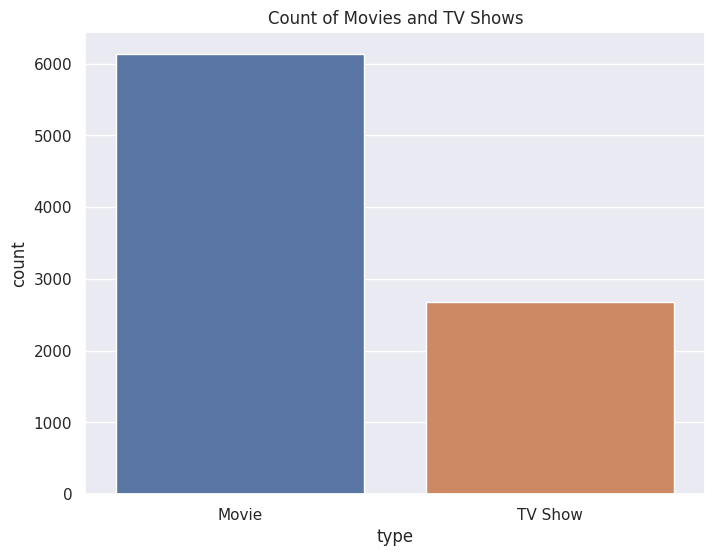

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='type')
plt.title("Count of Movies and TV Shows")
plt.show()

**GRAPHICALLY REPRESENTING THE MOVIE AND TV SHOW COUNT IN A PARTICULAR COUNTRY**

Enter the Country:India


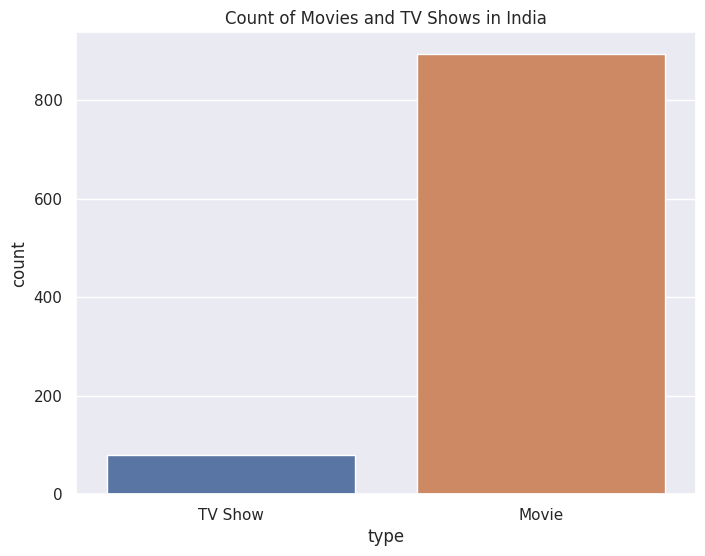

In [ ]:
selected_country = input("Enter the Country:")  # Replace with your desired country

# Step 3: Filter the data for the selected country
filtered_data = data[data['country'] == selected_country]

# Step 4: Create a countplot of the 'type' column
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_data, x='type')
plt.title(f"Count of Movies and TV Shows in {selected_country}")
plt.show()

**PRINTING THE TOP 25 COUNTRIES WHICH PROVIDE MAXIMUM VIEWERSHIP TO US**

In [ ]:
import pandas as pd
from tabulate import tabulate

# Group the data by 'country' and count the number of shows/movies per country
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Sort the counts in descending order
country_counts = country_counts.sort_values(by='Count', ascending=False)

# Select the top 15 countries
top_15_countries = country_counts.head(25)

# Use tabulate to format the data into a table
table = tabulate(top_15_countries, headers='keys', tablefmt='pretty')

print("Top 15 Countries with the Highest Count of Shows/Movies:")
print(table)



Top 15 Countries with the Highest Count of Shows/Movies:
+----+-------------------------------+-------+
|    |            Country            | Count |
+----+-------------------------------+-------+
| 0  |         United States         | 2818  |
| 1  |             India             |  972  |
| 2  |        United Kingdom         |  419  |
| 3  |             Japan             |  245  |
| 4  |          South Korea          |  199  |
| 5  |            Canada             |  181  |
| 6  |             Spain             |  145  |
| 7  |            France             |  124  |
| 8  |            Mexico             |  110  |
| 9  |             Egypt             |  106  |
| 10 |            Turkey             |  105  |
| 11 |            Nigeria            |  95   |
| 12 |           Australia           |  87   |
| 13 |            Taiwan             |  81   |
| 14 |           Indonesia           |  79   |
| 15 |            Brazil             |  77   |
| 16 |          Philippines          |  75   |
| 1


**THIS CODE FILTERS OUR DATA TO FIND HIGH-RATED MOVIES AND TV SHOWS (WITH RATINGS ABOVE 8.0) AND CREATES A BAR GRAPH TO VISUALIZE THEIR COUNTS BY RELEASE YEAR. IT HELPS US UNDERSTAND THE DISTRIBUTION OF HIGH-RATED CONTENT OVER TIME**

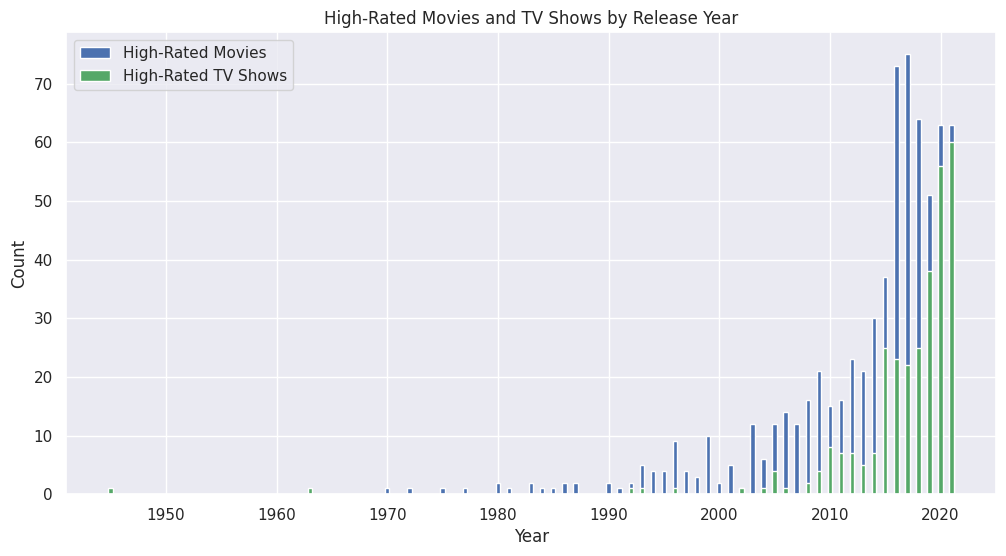

In [ ]:
movies = data[(data['type'] == 'Movie') & (data['rating.1'] >= 8.0)]
tv_shows = data[(data['type'] == 'TV Show') & (data['rating.1'] >= 8.0)]

# Step 3: Group and count movies and TV shows by release year
movies_by_year = movies['release_year'].value_counts().sort_index()
tv_shows_by_year = tv_shows['release_year'].value_counts().sort_index()

# Step 4: Create bar graphs for movies and TV shows by year
plt.figure(figsize=(12, 6))
plt.bar(movies_by_year.index, movies_by_year.values, width=0.4, label='High-Rated Movies', color='b')
plt.bar(tv_shows_by_year.index, tv_shows_by_year.values, width=0.4, label='High-Rated TV Shows', color='g')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('High-Rated Movies and TV Shows by Release Year')
plt.legend()
plt.show()


**CODE LETS YOU INPUT A COUNTRY, THEN IDENTIFIES AND DISPLAYS THE TOP 25 POPULAR MOVIES IN THAT COUNTRY BASED ON RATINGS AND VOTES**

In [ ]:
import pandas as pd
from tabulate import tabulate

selected_country = input("Enter the Country:")

filtered_data = data[(data['country'] == selected_country) & (data['type'] == 'Movie')]

# Convert 'rating.1' and 'votes' to numeric, handling non-numeric values as NaN
filtered_data['rating.1'] = pd.to_numeric(filtered_data['rating.1'], errors='coerce')
filtered_data['votes'] = pd.to_numeric(filtered_data['votes'], errors='coerce')

# Calculate a popularity score based on 'rating.1' and 'votes'
filtered_data['popularity_score'] = filtered_data['rating.1'] + filtered_data['votes']

# Find the top 25 most popular movies
top_25_movies = filtered_data.nlargest(25, 'popularity_score')

if not top_25_movies.empty:
    # Display the top 25 most popular movies
    print(f"The top 25 most popular movies in {selected_country} are:")
    print(tabulate(top_25_movies[['title', 'rating.1', 'votes']], headers='keys', tablefmt='pretty'))
else:
    print(f"No movies found in {selected_country}.")



Enter the Country:India
The top 25 most popular movies in India are:
+------+--------------------------+----------+-------+
|      |          title           | rating.1 | votes |
+------+--------------------------+----------+-------+
| 4112 |      Ugly Aur Pagli      |   5.6    | 993.0 |
| 4303 |     Vanjagar Ulagam      |   6.5    | 979.0 |
| 4577 |        Khoobsurat        |   6.2    | 975.0 |
| 6831 |           Gelo           |   5.9    | 961.0 |
| 2954 |          Thambi          |   5.6    | 945.0 |
| 8799 |          Zenda           |   9.1    | 939.0 |
| 4506 |   Meghnadbodh Rohoshyo   |   7.2    | 937.0 |
| 4614 |     What the Jatt!!      |   8.6    | 935.0 |
| 3299 |          U Turn          |   8.6    | 932.0 |
| 3268 |       House Arrest       |   5.2    | 932.0 |
| 2626 |       The Lift Boy       |   8.2    | 927.0 |
| 4134 |       Manusangada        |   5.3    | 922.0 |
| 3602 | Jaoon Kahan Bata Ae Dil  |   7.1    | 920.0 |
| 4825 |       Lust Stories       |   7.6    | 907.

<ipython-input-26-523a063fd9e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['rating.1'] = pd.to_numeric(filtered_data['rating.1'], errors='coerce')
<ipython-input-26-523a063fd9e8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['votes'] = pd.to_numeric(filtered_data['votes'], errors='coerce')
<ipython-input-26-523a063fd9e8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

**WE SEE THE DESCRIPTION OF TWO PARTCULAR COLUMNS OF OUR DATASET**

In [ ]:
# Print statistics for 'rating.1' and 'votes' columns
print(data['rating.1'].describe())
print(data['votes'].describe())


count    7643.000000
mean        6.641764
std         1.217128
min         1.700000
25%         5.900000
50%         6.800000
75%         7.500000
max         9.600000
Name: rating.1, dtype: float64
count    3276.000000
mean      351.066545
std       283.178181
min         5.000000
25%       103.000000
50%       275.500000
75%       566.000000
max       999.000000
Name: votes, dtype: float64


**HERE WE GET TO SEE THE MOST POPULAR SHOWS RELEASED IN A YEAR BASED ON THE VOTES RECEIVED BY THE PARTICULAR SHOW**

Enter the Year:2004


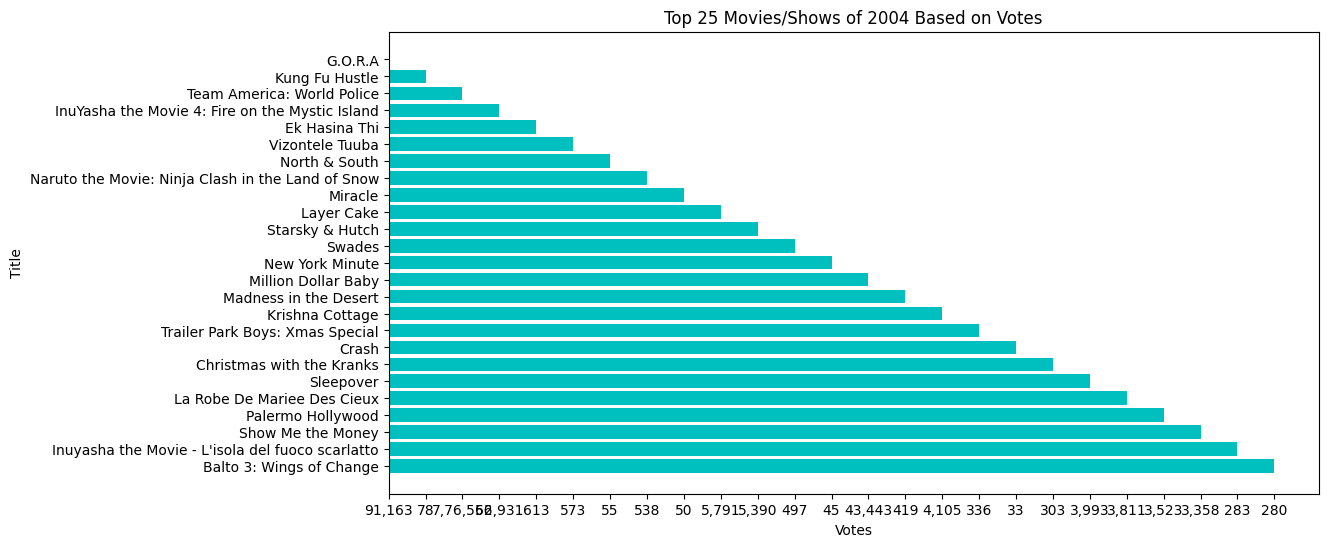

In [ ]:
import matplotlib.pyplot as plt

year_to_analyze = int(input("Enter the Year:"))  # Replace with the desired year

# Step 3: Filter the data for the specified year and sort by votes
filtered_data = data[data['release_year'] == year_to_analyze]

# Check if there is data for the specified year
if not filtered_data.empty:
    top_movies_shows = filtered_data.sort_values(by='votes', ascending=False)

    # Step 4: Select the top 25 movies or shows
    top_25 = top_movies_shows.head(25)

    # Step 5: Create a bar graph to represent the top movies or shows
    plt.figure(figsize=(12, 6))
    plt.barh(top_25['title'], top_25['votes'], color='c')
    plt.xlabel('Votes')
    plt.ylabel('Title')
    plt.title(f'Top 25 Movies/Shows of {year_to_analyze} Based on Votes')
    plt.gca().invert_yaxis()  # Invert the y-axis for the highest votes at the top
    plt.show()
else:
    print(f"No data found for the year {year_to_analyze}.")


**Genre Analysis**

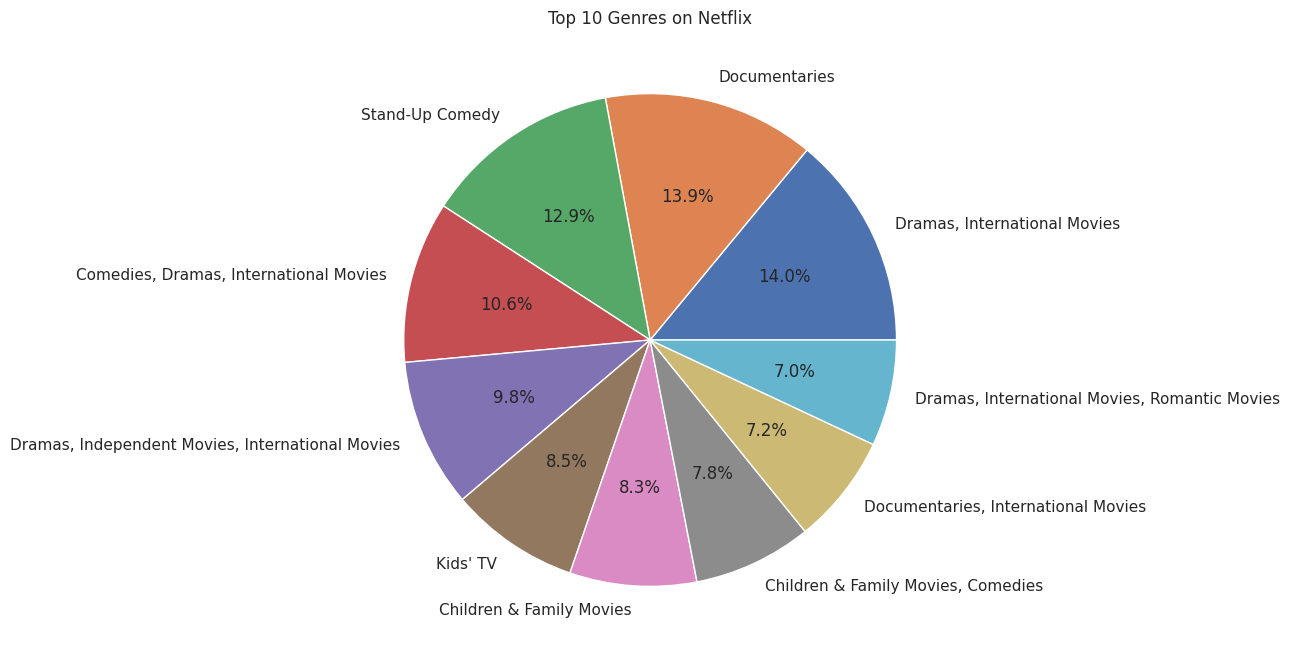

In [ ]:
# Create a pie chart to visualize the distribution of genres
import matplotlib.pyplot as plt

genre_counts = data['listed_in'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Top 10 Genres on Netflix')
plt.show()


**Country Analysis based on the number of movies released in the top 10 countries**

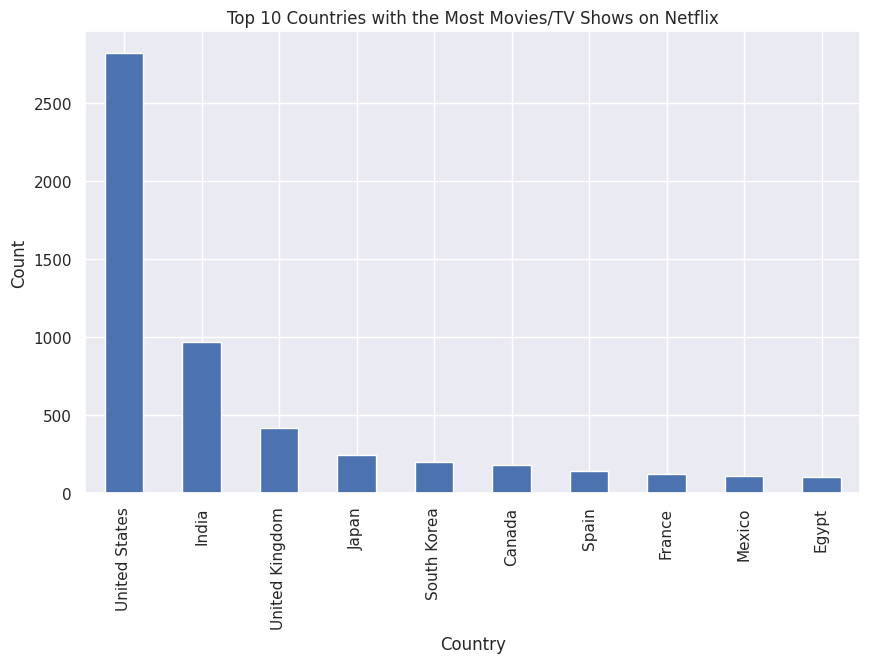

In [ ]:
# Create a bar chart to show the count of movies and TV shows by country
country_counts = data['country'].value_counts().head(10)
country_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries with the Most Movies/TV Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


**Time Series Analysis Of TV shows and Movies**

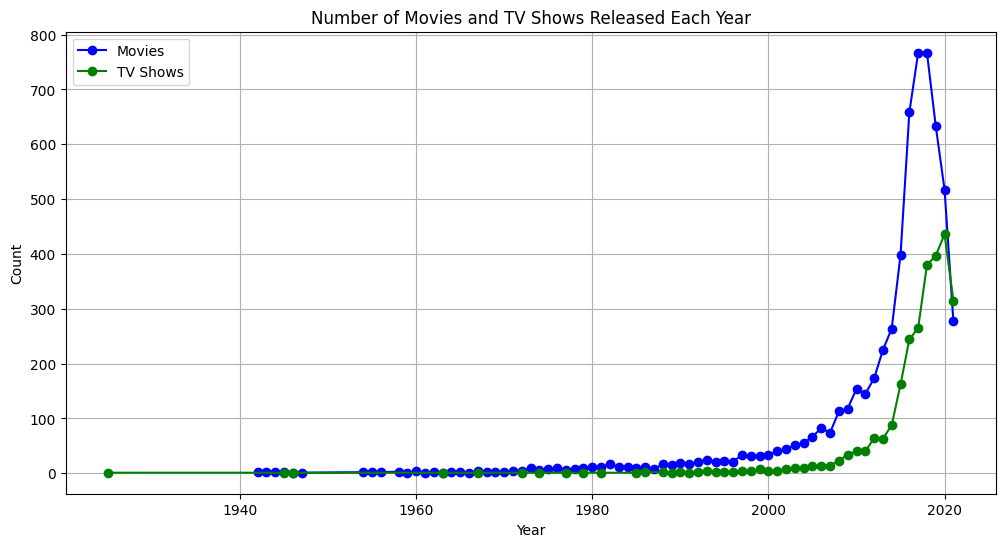

In [ ]:
# Create a line chart to visualize the number of movies and TV shows released each year
content_by_year = data['release_year'].value_counts().sort_index()
movies_by_year = data[data['type'] == 'Movie']['release_year'].value_counts().sort_index()
tv_shows_by_year = data[data['type'] == 'TV Show']['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

# Plot the number of movies by year
plt.plot(movies_by_year.index, movies_by_year.values, label='Movies', marker='o', linestyle='-', color='b')

# Plot the number of TV shows by year
plt.plot(tv_shows_by_year.index, tv_shows_by_year.values, label='TV Shows', marker='o', linestyle='-', color='g')

plt.title('Number of Movies and TV Shows Released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()



**Filtering based on director**

In [ ]:
# Step 2: Get the director's name as input from the user
director_name = input("Enter the director's name: ")

# Step 3: Filter movies directed by the specified director
director_movies = data[(data['type'] == 'Movie') & (data['director'] == director_name)]

# Step 4: Display the filtered movies
if not director_movies.empty:
    print(f"Movies directed by {director_name}:")
    print(director_movies[['title', 'release_year']])
else:
    print(f"No movies found directed by {director_name}.")


Enter the director's name: Kirsten Johnson
Movies directed by Kirsten Johnson:
                  title  release_year
0  Dick Johnson Is Dead          2020


In [ ]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

**The DIfferent Ratings :**
'PG-13': Parental Guidance for children under 13; some material may be inappropriate for young children.
'TV-MA': Mature Audience; specifically designed to be viewed by adults and may be unsuitable for children under 17.
'PG': Parental Guidance; some material may not be suitable for children.
'TV-14': Parents urged to exercise "greater" care; unsuitable for children under 14.
'TV-PG': Parental Guidance suggested; some material may not be suitable for children.
'TV-Y': Suitable for all children.
'TV-Y7': Suitable for children ages 7 and older.
'R': Restricted; children under 17 require accompanying parent or adult guardian.
'TV-G': Suitable for all ages.
'G': General Audience; all ages are admitted.
'NC-17': No Children Under 17 Admitted; not suitable for children under 17.
'NR': Not Rated; content has not been officially rated.
'TV-Y7-FV': Suitable for children ages 7 and older with fantasy violence.
'UR': Unrated; a rating assigned when a film has not been submitted for rating or falls outside the rating system



**A Pie Chart Demonstrating the percentage of each rating shows in our Dataset**

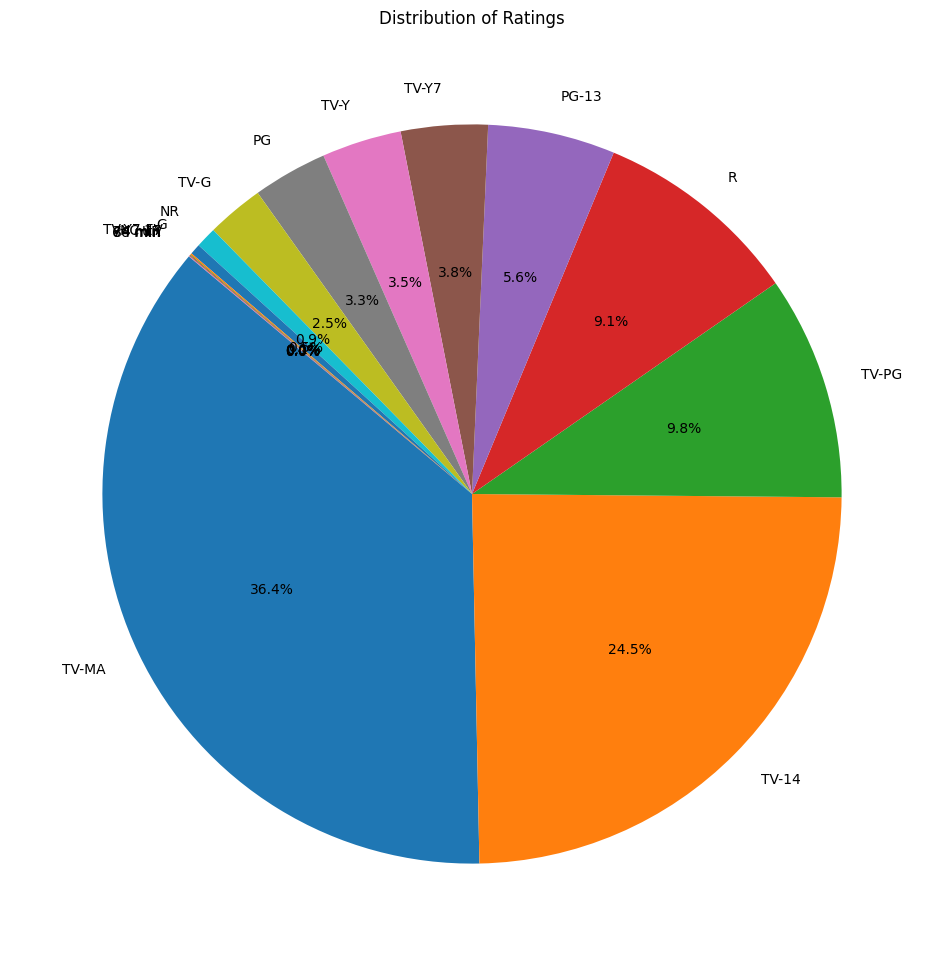

In [ ]:
# Count the occurrences of each content rating
rating_counts = data['rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(12,12))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.show()


**The popular Adult Shows**

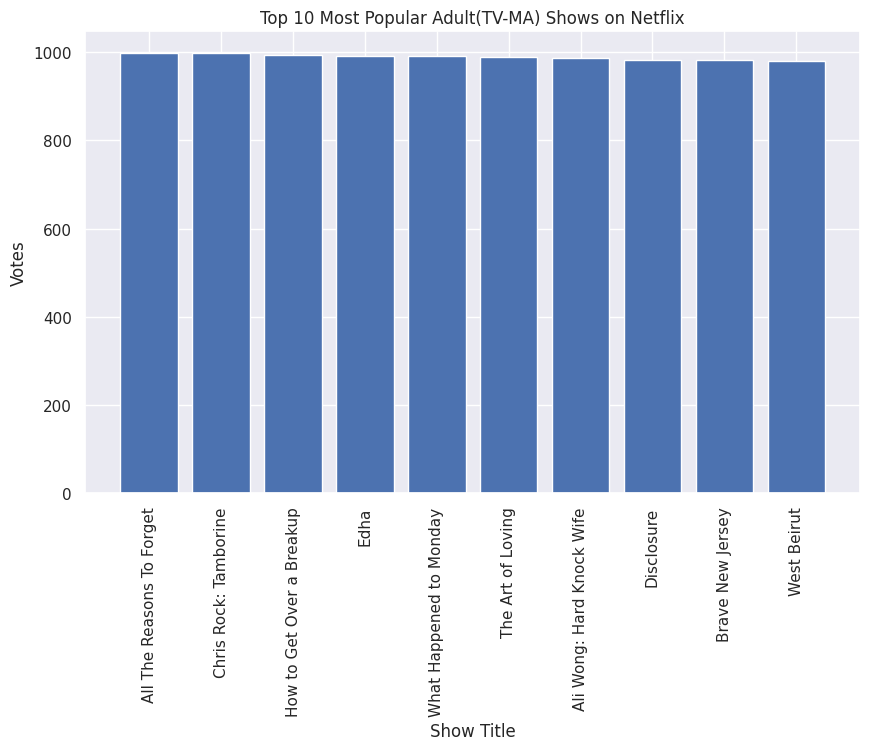

In [ ]:
tv_ma_shows = data[data['rating'] == 'TV-MA']

# Step 3: Sort the filtered data by 'votes' (you can also use 'rating.1')
sorted_tv_ma_shows = tv_ma_shows.sort_values(by='votes', ascending=False)

# Step 4: Select the top N most popular shows (e.g., top 10)
top_n = 10
top_tv_ma_shows = sorted_tv_ma_shows.head(top_n)

# Step 5: Create a bar graph to visualize the results
plt.figure(figsize=(10, 6))
plt.bar(top_tv_ma_shows['title'], top_tv_ma_shows['votes'], color='b')
plt.xticks(rotation=90)
plt.title(f'Top {top_n} Most Popular Adult(TV-MA) Shows on Netflix')
plt.xlabel('Show Title')
plt.ylabel('Votes')
plt.show()

**Most popular comedy movies**

In [ ]:
# Step 2: Filter the data to include only comedy movies
comedy_movies = data[data['listed_in'].str.contains('Comedy', case=False, na=False)]

# Step 3: Sort the filtered data by a popularity metric (e.g., 'votes')
sorted_comedy_movies = comedy_movies.sort_values(by='votes', ascending=False)

# Step 4: Select the most popular comedy movie
most_popular_comedy = sorted_comedy_movies.head(15)

# Step 5: Display the most popular comedy movie
print("The most popular comedy movie on Netflix is:")
print(most_popular_comedy[['title', 'rating', 'votes']])


The most popular comedy movie on Netflix is:
                                                  title rating   votes
5039                              Chris Rock: Tamborine  TV-MA     997
4863                          Ali Wong: Hard Knock Wife  TV-MA     986
5724               Dana Carvey: Straight White Male, 60  TV-MA      98
5816                            Jim Gaffigan: King Baby  TV-PG     967
7813                                   Queens vs. Kings  TV-14      96
4435  Edmilson Filho: Notas, Comedy about Relationships  TV-MA     950
5357                             Maz Jobrani: Immigrant  TV-14     946
7179                         Kevin Hart: Let Me Explain      R      93
5230                       Christina P: Mother Inferior  TV-MA     928
2702  Tiffany Haddish: She Ready! From the Hood To H...  TV-MA     926
4234                  Gina Yashere: Laughing to America  TV-MA     923
1198               RebellComedy: Straight Outta the Zoo  TV-MA  92,424
8437                            

**Popular Documenatries**

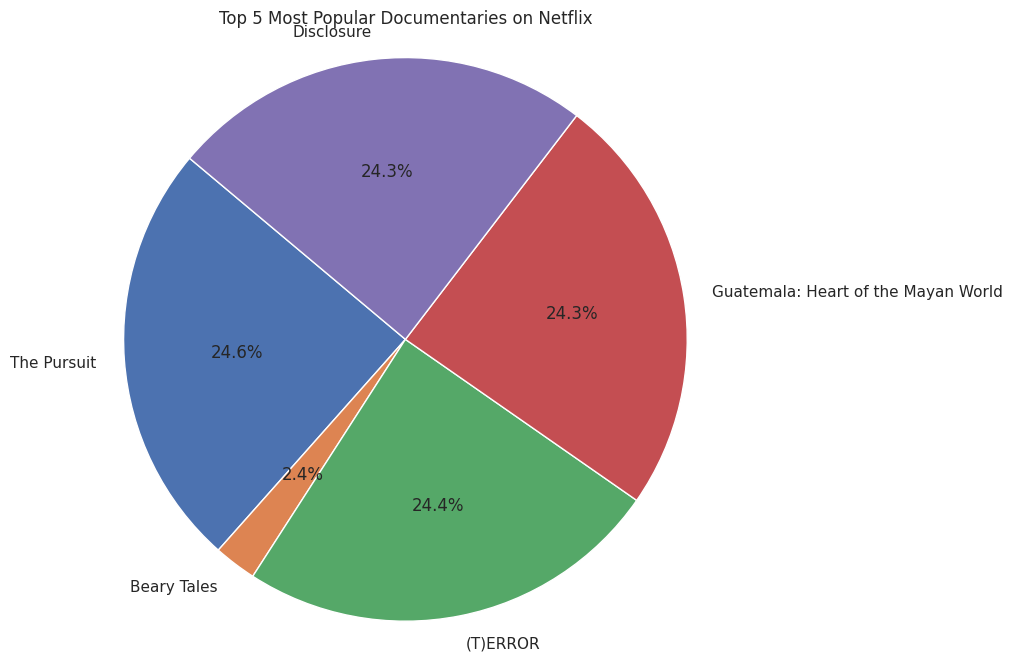

In [ ]:
documentaries = data[data['listed_in'].str.contains('Documentaries', case=False, na=False)]

# Step 3: Sort the filtered data by 'votes' (you can use 'rating.1' instead)
sorted_documentaries = documentaries.sort_values(by='votes', ascending=False)

# Step 4: Select the top N most popular documentaries (e.g., top 5)
top_n = 5
top_documentaries = sorted_documentaries.head(top_n)

# Step 5: Create a pie chart to visualize the distribution of the top documentaries
plt.figure(figsize=(8, 8))
plt.pie(top_documentaries['votes'], labels=top_documentaries['title'], autopct='%1.1f%%', startangle=140)
plt.title(f'Top {top_n} Most Popular Documentaries on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

**Now Moving On to the Most Popular Cast Members in the different show Avaialble on our Platform**

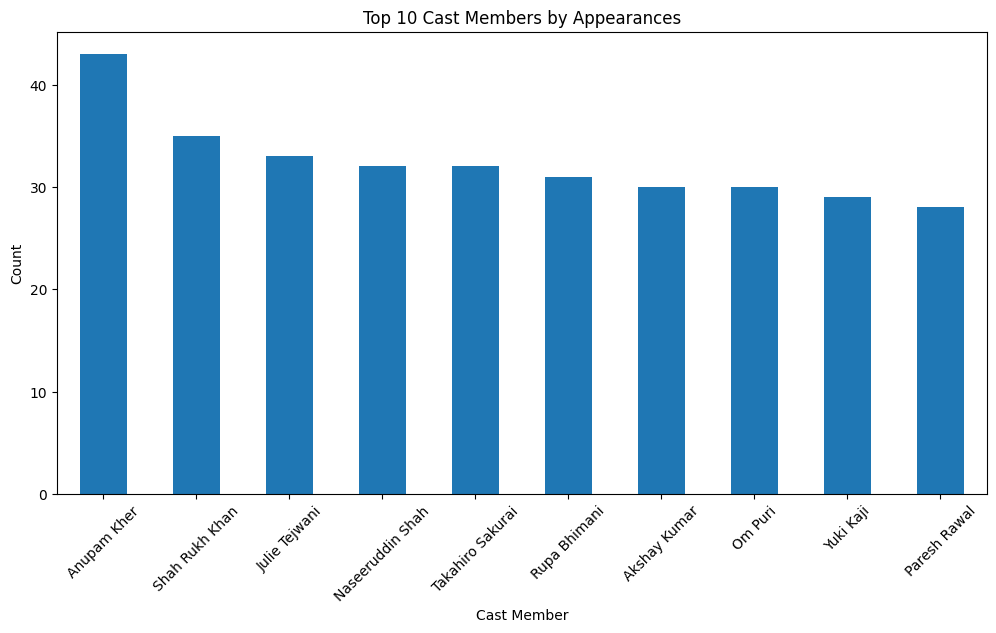

In [ ]:
top_cast_members = data['cast'].str.split(', ').explode().value_counts()[:10]  # Top 10 cast members
plt.figure(figsize=(12, 6))
top_cast_members.plot(kind='bar')
plt.xlabel('Cast Member')
plt.ylabel('Count')
plt.title('Top 10 Cast Members by Appearances')
plt.xticks(rotation=45)
plt.show()

**Filtering The Movies Based on The actor**

In [ ]:
# Step 1: Get the name of the actor/actress from the user
cast_name = input("Enter the name of the actor/actress: ")
cast_movies = data[(data['type'] == 'Movie') & (data['cast'].str.contains(cast_name))]

# Step 2: Display the filtered movies
if not cast_movies.empty:
    print(f"Movies by {cast_name}:")
    print(cast_movies[['title', 'release_year']])
else:
    print(f"No movies found.")


Enter the name of the actor/actress: Akshay Kumar
Movies by Akshay Kumar:
                                         title  release_year
209        Once Upon a Time in Mumbai Dobaara!          2013
1305                      Awara Paagal Deewana          2002
1865                           Phir Hera Pheri          2006
1946                                   Welcome          2007
2268                                      Boss          2013
2273                            Gabbar Is Back          2015
2281                                 Oh My God          2012
2289                                Special 26          2013
2544                            Action Replayy          2010
2716                                  Brothers          2015
3494                   Inside Man: Most Wanted          2019
4679                              Naam Shabana          2017
4693                                   Pad Man          2018
4694                     Toilet: Ek Prem Katha          2017
4728       

**We finally Analyse The durations of the movie and the count of shows having that duration in the datas**et

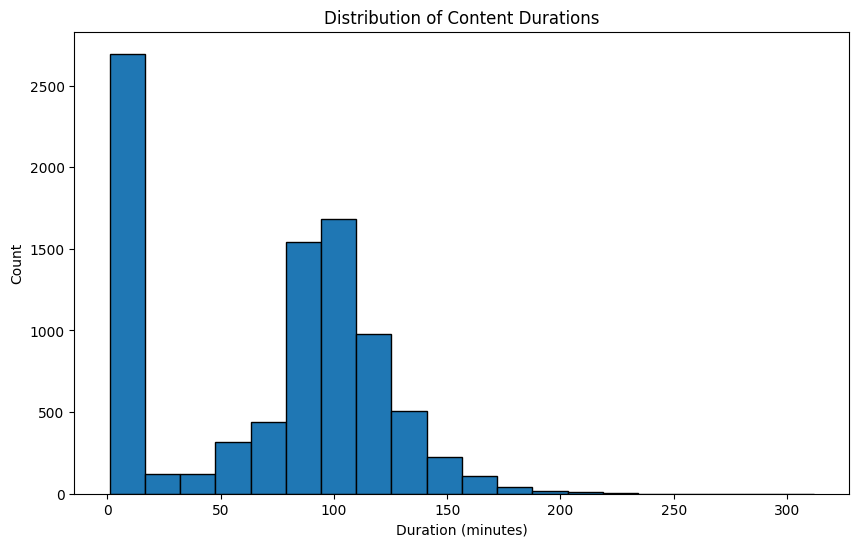

In [ ]:
data['duration'] = data['duration'].str.extract('(\d+)').astype(float)

# Create a histogram of content durations
plt.figure(figsize=(10, 6))
plt.hist(data['duration'].dropna(), bins=20, edgecolor='k')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Content Durations')
plt.show()

**We Analyse Another column of Our Data set in Particular the 'date_added' to see the trend of contrent added Over The years**

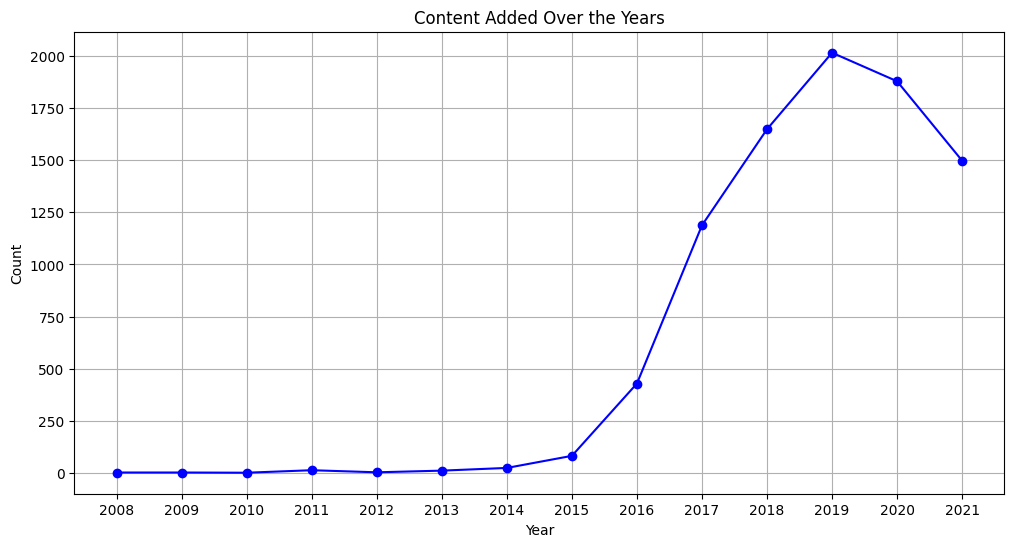

In [ ]:
# Group the data by the year content was added
content_added_by_year = data['date_added'].str.extract(r'(\d{4})')[0].value_counts().sort_index()

# Create a line chart to visualize the trend
plt.figure(figsize=(12, 6))
plt.plot(content_added_by_year.index, content_added_by_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Content Added Over the Years')
plt.grid(True)
plt.show()




                                                                  A PROJECT MADE BY MEDHA ,ARMAN AND EESHANK ✌!!





